In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.utils import resample

In [ ]:
# Load the data into a Pandas dataframe
df = pd.read_csv('/content/data_combined.csv')

In [ ]:
df

,Unnamed: 0,content,label
0,0,Researchers use deep learning to simulate chlo...,Positive
1,1,Why is our @Conservatives government so evil?\...,Negative
2,2,"Texas Oilfield Waste Company Contributed $53,7...",Negative
3,3,Epic California snowpack is now the deepest it...,Negative
4,4,If #climatechange is real and not a hoax why d...,Negative
...,...,...,...
2200,353,𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐯𝐞𝐧 𝐃𝐄𝐈 with @team73bit (73bit.com). \...,Neutral
2201,354,𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐯𝐞𝐧 𝐃𝐄𝐈 with @team73bit (73bit.com). \...,Neutral
2202,355,Need guidance on how to identify #sustainabili...,Positive
2203,356,𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐯𝐞𝐧 𝐃𝐄𝐈 with @team73bit (73bit.com). \...,Neutral


In [ ]:
df['label'].value_counts()

Neutral     921
Positive    911
Negative    373
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

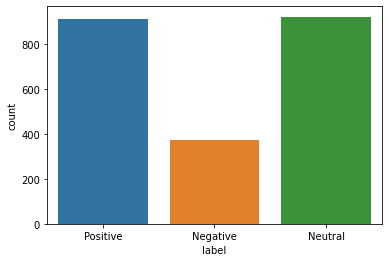

In [ ]:
# Create a countplot of the labels
sns.countplot(x='label', data=df)

In [48]:
# download stopwords and wordnet lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [49]:
def preprocess(text):
    # remove special characters and digits
    text = re.sub('[^a-zA-Z]', ' ', text)
    # convert to lowercase
    text = text.lower()
    # split into words
    words = text.split()
    # remove stopwords
    stopword_list = set(stopwords.words('english'))
    words = [w for w in words if w not in stopword_list]
    # stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    # join the words back into a string
    text = ' '.join(words)
    return text

In [50]:
# apply preprocessing function to the content column
df['content'] = df['content'].apply(preprocess)

In [51]:
df

,Unnamed: 0,content,label
0,0,research use deep learn simul chlorophyl amp p...,Positive
1,1,conserv govern evil rishisunak climatechang co...,Negative
2,2,texa oilfield wast compani contribut regul ove...,Negative
3,3,epic california snowpack deepest decad thank c...,Negative
4,4,climatechang real hoax biden obama gore ocean ...,Negative
...,...,...,...
2200,353,team bit bit com diversityequityinclus dei soc...,Neutral
2201,354,team bit bit com diversityequityinclus dei soc...,Neutral
2202,355,need guidanc identifi sustain initi leader org...,Positive
2203,356,team bit bit com diversityequityinclus dei soc...,Neutral


In [87]:
# Get indices of positive examples
#positive_indices = df[df['label'] == 'Positive'].index

In [88]:
# Randomly select subset of positive examples
#n_samples = len(positive_indices)
#subset_indices = np.random.choice(positive_indices, size=n_samples//2, replace=False)


In [89]:
# Get indices of neutral examples
#neutral_indices = df[df['label'] == 'Neutral'].index

In [90]:
# Randomly select subset of neutral examples
#n_samples = len(neutral_indices)
#neutral_indices = np.random.choice(neutral_indices, size=n_samples//2, replace=False)


In [91]:
# Get indices of negative and neutral examples
#negative_indices = df[df['label'] == 'Negative'].index


In [92]:
# Concatenate subset of positive examples with all negative and neutral examples
#df_undersampled = pd.concat([df.loc[subset_indices], df.loc[negative_indices], df.loc[neutral_indices]])

In [93]:
# Shuffle the rows of the new dataframe
#df_undersampled = df_undersampled.sample(frac=1).reset_index(drop=True)

In [94]:
#df_undersampled

In [95]:
#df_undersampled['label'].value_counts()

In [96]:
# Create a countplot of the labels
#sns.countplot(x='label', data=df_undersampled)

In [62]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

In [97]:
# Fit and transform the text data
X = vectorizer.fit_transform(df['content'])

In [98]:
X

<2205x10876 sparse matrix of type '<class 'numpy.float64'>'
	with 44214 stored elements in Compressed Sparse Row format>

In [99]:
# Get the label data
y = df['label']


In [100]:
y

0       Positive
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
2200     Neutral
2201     Neutral
2202    Positive
2203     Neutral
2204    Positive
Name: label, Length: 2205, dtype: object

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Create a logistic regression model
#clf = LogisticRegression()

In [69]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [70]:
# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_micro')

In [71]:
# Train the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1_micro')

In [72]:
# Get the best model from GridSearchCV
clf = grid_search.best_estimator_

In [75]:
# Train the model on the training data
clf.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

In [76]:
# Predict on the test data
y_pred = clf.predict(X_test)

In [77]:
y_pred

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Neutral', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Positive', 'Neutral', 'Negative', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Negative', 'Neutral', 'Negative', 'Negative',
       'Neutral', 'Positive', 'Negative', 'Neutral', 'Negative',
       'Neutral', 'Positive', 'Negative', 'Negative', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Negative', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative',
    

In [103]:
"""from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# OR
print("Accuracy:",logreg.score(X_test, y_test))"""

'from sklearn.linear_model import LogisticRegression\nlogreg = LogisticRegression()\nlogreg.fit(X_train,y_train)\ny_pred = logreg.predict(X_test)\n\nfrom sklearn import metrics\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\n# OR\nprint("Accuracy:",logreg.score(X_test, y_test))'

In [104]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [105]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [106]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [107]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.4388349514563107


In [108]:
logreg = LogisticRegression(C = 1.0, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.3875968992248062


In [110]:
# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [111]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision (micro):", precision)
print("Recall (micro):", recall)
print("Micro F1 score:", f1_micro)
print("Macro F1 score:", f1_macro)
print("Weighted F1 score:", f1_weighted)

Accuracy: 0.3875968992248062
Precision (micro): 0.3875968992248062
Recall (micro): 0.3875968992248062
Micro F1 score: 0.3875968992248062
Macro F1 score: 0.3732341578734936
Weighted F1 score: 0.37544200528596083


In [109]:
from sklearn.metrics import classification_report

# assuming y_true and y_pred are arrays of true and predicted labels respectively
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

    Negative       0.40      0.21      0.28        81
     Neutral       0.40      0.41      0.40        93
    Positive       0.37      0.54      0.44        84

    accuracy                           0.39       258
   macro avg       0.39      0.38      0.37       258
weighted avg       0.39      0.39      0.38       258

